## Задание 5.1

Набор данных тут: https://github.com/sismetanin/rureviews, также есть в папке [Data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). Те, кто предпочитает работать с английским языком, могут использовать набор данных `sms_spam`.

Применим полученные навыки и решим задачу анализа тональности отзывов.

Нужно повторить весь пайплайн от сырых текстов до получения обученной модели.

Возможные шаги предобработки:
1. токенизация
2. приведение к нижнему регистру
3. удаление стоп-слов
4. лемматизация
5. векторизация (с настройкой гиперпараметров)

Обязательно использование векторайзеров:
1. мешок n-грамм (диапазон для n подбирайте самостоятельно, запрещено использовать только униграммы).
2. tf-idf ((диапазон для n подбирайте самостоятельно, также нужно подбирать гиперпараметры max_df, min_df, max_features)
3. символьные n-граммы (диапазон для n подбирайте самостоятельно)

В качестве классификатора нужно использовать наивный байесовский классификатор.

Для сравнения векторайзеров между собой используйте precision, recall, f1-score и accuracy. Для этого сформируйте датафрейм, в котором в строках будут разные векторайзеры, а в столбцах разные метрики качества, а в  ячейках будут значения этих метрик для соответсвующих векторайзеров.

In [ ]:
from sklearn.tree import DecisionTreeClassifier # можно заменить на другой классификатор
from sklearn.naive_bayes import MultinomialNB # наивный байесовский классификатор
from sklearn.feature_extraction.text import CountVectorizer # модель "мешка слов", см. далее
import pandas as pd
import numpy as np

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

#!gdown 1j-DhO_XD5EqzOqVSR4Wz1kNzhLmpeTkZ
!gdown 1IKfQNbkGADSFUdyPdVjQS-ucFhOiT6sM

Downloading...
From: https://drive.google.com/uc?id=1IKfQNbkGADSFUdyPdVjQS-ucFhOiT6sM
To: /content/sms_spam.csv
100% 481k/481k [00:00<00:00, 82.5MB/s]


In [ ]:
#data = pd.read_csv('women-clothing-accessories.csv', sep='\t', usecols=[0, 1])
data = pd.read_csv('sms_spam.csv')
data.sample(10)

,type,text
583,spam,Not heard from U4 a while. Call me now am here...
2305,ham,Should I head straight there or what
4798,ham,I dont want to hear philosophy. Just say what ...
4662,ham,I meant middle left or right?
2815,ham,Ok...
947,spam,Summers finally here! Fancy a chat or flirt wi...
349,ham,In the end she might still vomit but its okay....
1525,ham,Is that seriously how you spell his name?
2733,ham,NEFT Transaction with reference number # for...
3231,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...


In [ ]:
#data.sentiment.value_counts()
data.type.value_counts()

ham     4812
spam     747
Name: type, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.text, data.type, train_size = 0.7)

**N-Grams**
Для начала просто попробуем предсказать данные используя только N-Грамы.

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,1))
vectorized_x_train = vectorizer.fit_transform(x_train)

clf = MultinomialNB()
clf.fit(vectorized_x_train, y_train)

vectorized_x_test = vectorizer.transform(x_test)
pred = clf.predict(vectorized_x_test)
print(classification_report(y_test, pred))
vectorized_x_train.shape

In [ ]:
bigram_vectorizer = CountVectorizer(ngram_range=(1,2))
bigram_vectorized_x_train = bigram_vectorizer.fit_transform(x_train)

biclf = MultinomialNB()
biclf.fit(bigram_vectorized_x_train, y_train)

vectorized_x_test = bigram_vectorizer.transform(x_test)
pred = biclf.predict(vectorized_x_test)
print(classification_report(y_test, pred))
bigram_vectorized_x_train.shape

In [ ]:
trigram_vectorizer = CountVectorizer(ngram_range=(1,3))
trigram_vectorized_x_train = trigram_vectorizer.fit_transform(x_train)

triclf = MultinomialNB()
triclf.fit(trigram_vectorized_x_train, y_train)

vectorized_x_test = trigram_vectorizer.transform(x_test)
pred = triclf.predict(vectorized_x_test)
print(classification_report(y_test, pred))
trigram_vectorized_x_train.shape

**Preprocess**

In [ ]:
import nltk # уже знакомая нам библиотека nltk
from nltk.tokenize import word_tokenize # готовый токенизатор библиотеки nltk
from nltk.corpus import stopwords # импортируем стоп-слова из библиотеки nltk
nltk.download('wordnet')
#!pip install pymorphy2
#from pymorphy2 import MorphAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
import string
#pymorph = MorphAnalyzer()
from nltk.stem import WordNetLemmatizer
lemmat = WordNetLemmatizer()
noise = stopwords.words('english')
#noise = ['и', 'в', 'во', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', 'иногда', 'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно', 'всю', 'между']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Приведем к нижнему регистру слова

Произведем токенизация текста

Произведем удаление знаков препинания


In [ ]:
def preprocess(text):

    text = text.lower()

    for punctuation in string.punctuation:
      text = text.replace(punctuation, " ")

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in noise]

    #tokens = [pymorph.parse(word)[0].normal_form for word in tokens]
    lemmat = WordNetLemmatizer()
    tokens = [lemmat.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

#data.review = data.review.apply(preprocess)
data.text = data.text.apply(preprocess)

print(data.text)

0                                 hope good week checking
1                                      k give back thanks
2                                            also cbe pay
3       complimentary 4 star ibiza holiday £10 000 cas...
4       okmail dear dave final notice collect 4 teneri...
5                          aiya discus later lar pick u 4
6                                               much buzy
7                            please ask mummy call father
8       marvel mobile play official ultimate spider ma...
9                             fyi usf swing room whenever
10      sure thing big man hockey election 6 shouldn€˜...
11                                           anything lor
12      march ending ready call sure problem capital n...
13                                   hmm well night night
14                                    k sure get noon see
15                       ha ha cool cool chikku chikku db
16      darren wa saying dat u meeting da ge den dun m...
17            

In [ ]:
def bayes_classificator(x,y,x_train, x_test, y_train,analyzer='word',vectorizer_type='count',max_df=None, min_df=None, max_features=None):
  if vectorizer_type=='count':
    vectorizer = CountVectorizer(ngram_range=(x, y),analyzer=analyzer)

  if vectorizer_type=='tfidf':
    vectorizer = TfidfVectorizer(ngram_range=(x, y), max_df=max_df, min_df=min_df, max_features=max_features)

  vectorized_x_train = vectorizer.fit_transform(x_train)
  vectorized_x_test = vectorizer.transform(x_test)

  clf = MultinomialNB()
  clf.fit(vectorized_x_train, y_train)
  y_pred = clf.predict(vectorized_x_test)

  return y_pred

In [ ]:
def calculate_metrics(y_test, y_pred):
   return pd.DataFrame({
        'precision': [precision_score(y_test, y_pred, average='weighted')],
        'recall': [recall_score(y_test, y_pred, average='weighted')],
        'f1': [f1_score(y_test, y_pred, average='weighted')],
        'accuracy': [accuracy_score(y_test, y_pred)]
    })

In [ ]:
def n_grams_iterator(x, y, x_train, x_test, y_train, y_test):
    y_pred = bayes_classificator(x,y,x_train, x_test, y_train,analyzer='word',vectorizer_type='count')
    metrics = calculate_metrics(y_test, y_pred)

    return pd.DataFrame({
        'vectorizer': [f'N-Grams({x}, {y})'],
        **metrics
    })

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.text, data.type, train_size=0.7)

result = pd.DataFrame(columns=['vectorizer', 'precision', 'recall', 'f1', 'accuracy'])
for i in range(1, 6):
    for j in range(i, 6):
        res = n_grams_iterator(i, j, x_train, x_test, y_train, y_test)
        result = pd.concat([result, res], ignore_index=True)

In [ ]:
print(result)

       vectorizer  precision    recall        f1  accuracy
0   N-Grams(1, 1)   0.983037  0.983213  0.983049  0.983213
1   N-Grams(1, 2)   0.981874  0.982014  0.981690  0.982014
2   N-Grams(1, 3)   0.983767  0.983813  0.983504  0.983813
3   N-Grams(1, 4)   0.983767  0.983813  0.983504  0.983813
4   N-Grams(1, 5)   0.983767  0.983813  0.983504  0.983813
5   N-Grams(2, 2)   0.977161  0.977218  0.976561  0.977218
6   N-Grams(2, 3)   0.979710  0.979616  0.979028  0.979616
7   N-Grams(2, 4)   0.979710  0.979616  0.979028  0.979616
8   N-Grams(2, 5)   0.979710  0.979616  0.979028  0.979616
9   N-Grams(3, 3)   0.961611  0.959832  0.956718  0.959832
10  N-Grams(3, 4)   0.961611  0.959832  0.956718  0.959832
11  N-Grams(3, 5)   0.961611  0.959832  0.956718  0.959832
12  N-Grams(4, 4)   0.950802  0.947842  0.942248  0.947842
13  N-Grams(4, 5)   0.950269  0.947242  0.941501  0.947242
14  N-Grams(5, 5)   0.942878  0.938849  0.930772  0.938849


  Такой результат я получил без использования стоп-слов(для русских слов):

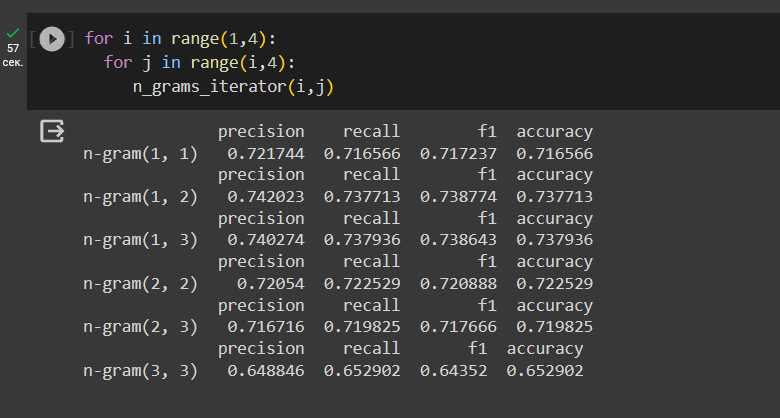

Потом я решил использовать обычные стоп-слова, которые даны(для русских слов):


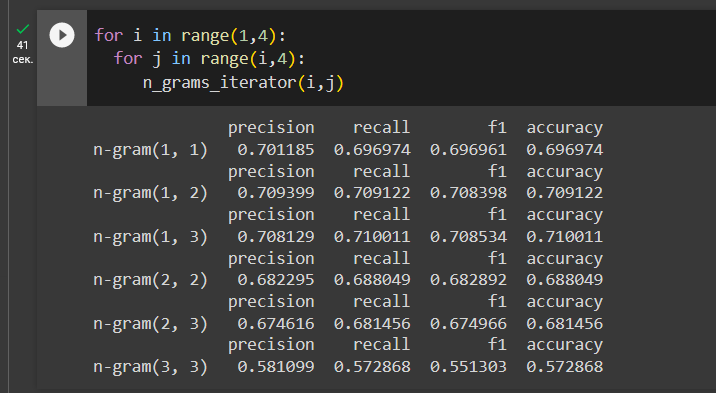

Я изменил список стоп-слов,удалил слова("ни,нет,не"), мы можем заметить что результат стал лучше чем со стандартным списком слов.(для русских слов)

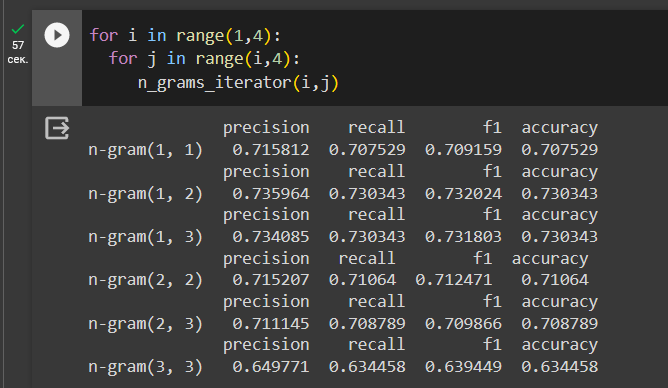

*Я пришел к такому выводу, что лучше не использовать стоп-слова, так как результат без них наилучший!(для русских слов)*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_method(x, y, max_df, min_df, max_features, x_train, x_test, y_train, y_test):
    y_pred = bayes_classificator(x,y,x_train, x_test, y_train,analyzer='word', vectorizer_type='tfidf',max_df=max_df, min_df=min_df, max_features=max_features)
    metrics = calculate_metrics(y_test, y_pred)

    return pd.DataFrame({
        'vectorizer': [f'tf-idf({x}, {y}, max_df={max_df}, min_df={min_df}, max_ft={max_features})'],
        **metrics
    })

In [ ]:
max_tfidf_range=[0.9,0.95]
min_tfidf_range=[0,0.001]
max_features_range=[20000,30000]
#Количество вхождений слова t в документ d: кол-во слов в документе (tf)
​

#Общее количество документов в коллекции D : Количество документов, содержащих слово t+1 (idf)
​


for x in range(1, 8):
    for y in range(x, 8):
        for max_df in max_tfidf_range:
            for min_df in min_tfidf_range:
                for max_features in max_features_range:
                    res = tfidf_method(x, y, max_df, min_df, max_features, x_train, x_test, y_train, y_test)
                    result = pd.concat([result, res], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
print(result)

                                            vectorizer  precision    recall  \
0                                        N-Grams(1, 1)   0.983037  0.983213   
1                                        N-Grams(1, 2)   0.981874  0.982014   
2                                        N-Grams(1, 3)   0.983767  0.983813   
3                                        N-Grams(1, 4)   0.983767  0.983813   
4                                        N-Grams(1, 5)   0.983767  0.983813   
5                                        N-Grams(2, 2)   0.977161  0.977218   
6                                        N-Grams(2, 3)   0.979710  0.979616   
7                                        N-Grams(2, 4)   0.979710  0.979616   
8                                        N-Grams(2, 5)   0.979710  0.979616   
9                                        N-Grams(3, 3)   0.961611  0.959832   
10                                       N-Grams(3, 4)   0.961611  0.959832   
11                                       N-Grams(3, 

In [ ]:
def char_ngram(x, y, x_train, x_test, y_train, y_test):
  y_pred = bayes_classificator(x,y,x_train, x_test, y_train, analyzer='char',vectorizer_type='count')
  metrics = calculate_metrics(y_test, y_pred)

  return pd.DataFrame(
    {
     'vectorizer': [f'char ngram({x}, {y})'],
      **metrics
    })

In [ ]:
for x in range(1, 6):
  for y in range(x,6):
    res = char_ngram(x, y, x_train, x_test, y_train, y_test)
    result = pd.concat([result, res],ignore_index=True)

In [ ]:
result_sort = result.sort_values(by='f1', ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(result_sort)

                                            vectorizer  precision    recall  \
2                                        N-Grams(1, 3)   0.983767  0.983813   
3                                        N-Grams(1, 4)   0.983767  0.983813   
4                                        N-Grams(1, 5)   0.983767  0.983813   
0                                        N-Grams(1, 1)   0.983037  0.983213   
1                                        N-Grams(1, 2)   0.981874  0.982014   
6                                        N-Grams(2, 3)   0.979710  0.979616   
7                                        N-Grams(2, 4)   0.979710  0.979616   
8                                        N-Grams(2, 5)   0.979710  0.979616   
585                                   char ngram(1, 5)   0.978219  0.978417   
930                                   char ngram(1, 5)   0.978219  0.978417   
567                                   char ngram(1, 5)   0.978219  0.978417   
592                                   char ngram(3, 

## Задание 5.2 Регулярные выражения

Регулярные выражения - способ поиска и анализа строк. Например, можно понять, какие даты в наборе строк представлены в формате DD/MM/YYYY, а какие - в других форматах.

Или бывает, например, что перед работой с текстом, надо почистить его от своеобразного мусора: упоминаний пользователей, url и так далее.

Навык полезный, давайте в нём тоже потренируемся.

Для работы с регулярными выражениями есть библиотека **re**

In [ ]:
import re

В регулярных выражениях, кроме привычных символов-букв, есть специальные символы:
* **а?** - ноль или один символ **а**
* **а+** - один или более символов **а**
* **а\*** - ноль или более символов **а** (не путать с +)
* **.** - любое количество любого символа


In [ ]:
result = re.findall('a?b.', 'aabbсabbcbb')
print(result)

['abb', 'abb', 'bb']


In [ ]:
result = re.findall('a*b.', 'aabbсabbcbb')
print(result)

['aabb', 'abb', 'bb']


In [ ]:
result = re.findall('a+b.', 'aabbсabbcbb')
print(result)

['aabb', 'abb']


Рассмотрим подробно несколько наиболее полезных функций:

### findall
возвращает список всех найденных непересекающихся совпадений.

Регулярное выражение **ab+c.**:
* **a** - просто символ **a**
* **b+** - один или более символов **b**
* **c** - просто символ **c**
* **.** - любой символ


In [ ]:
result = re.findall('ab+c.', 'abcdefghijkabcabcxabc')
print(result)

['abcd', 'abca']


Вопрос на внимательность: почему нет abcx?

**Задание**: вернуть список первых двух букв каждого слова в строке, состоящей из нескольких слов.

In [ ]:
example="Привет люди привет мир"
re.findall(r"\b\w{2}", example)
# word boundary \b

['Пр', 'лю', 'пр', 'ми']

### split
разделяет строку по заданному шаблону


In [ ]:
result = re.split(',', 'itsy, bitsy, teenie, weenie')
print(result)

['itsy', ' bitsy', ' teenie', ' weenie']


можно указать максимальное количество разбиений

In [ ]:
result = re.split(',', 'itsy, bitsy, teenie, weenie', maxsplit=2)
print(result)

['itsy', ' bitsy', ' teenie, weenie']


**Задание**: разбейте строку, состоящую из нескольких предложений, по точкам, но не более чем на 3 предложения.

In [ ]:
example="Привет люди планеты земля.Мы прибыли с миром.Принесли вам еды. У нас крутой корабль."
re.split(r"\.",example,maxsplit=2)

['Привет люди планеты земля',
 'Мы прибыли с миром',
 'Принесли вам еды. У нас крутой корабль.']

### sub
ищет шаблон в строке и заменяет все совпадения на указанную подстроку

параметры: (pattern, repl, string)

In [ ]:
result = re.sub('a', 'b', 'abcabc')
print (result)

bbcbbc


**Задание**: напишите регулярное выражение, которое позволит заменить все цифры в строке на "DIG".

In [ ]:
example="Ракета-525, Орбита-727"
re.sub(r"\d","DIG",example)

'Ракета-DIGDIGDIG, Орбита-DIGDIGDIG'

**Задание**: напишите  регулярное выражение, которое позволит убрать url из строки.

In [ ]:
example="Itmo https://my.itmo.ru/election/facultative"
re.sub(r"https?://[\w.:?/=]+","",example)

'Itmo '

### compile
компилирует регулярное выражение в отдельный объект

In [ ]:
# Пример: построение списка всех слов строки:
prog = re.compile('[А-Яа-яё\-]+')
prog.findall("Слова? Да, больше, ещё больше слов! Что-то ещё.")

['Слова', 'Да', 'больше', 'ещё', 'больше', 'слов', 'Что-то', 'ещё']

**Задание**: для выбранной строки постройте список слов, которые длиннее трех символов.

In [ ]:
example="Привет люди планеты земля.Мы прибыли с миром.Принесли вам еды. У нас крутой корабль."
wow = re.compile(r"\w{4,}")
wow.findall(example)

#wow = re.compile(r"\w{4,5}") длина от 4 до 5

['Привет',
 'люди',
 'планеты',
 'земля',
 'прибыли',
 'миром',
 'Принесли',
 'крутой',
 'корабль']

**Задание**: вернуть список доменов (@gmail.com) из списка адресов электронной почты:

```
abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz
```

In [ ]:
example="abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz"
wow=re.compile(r"@[\w.]+")
wow.findall(example)

['@gmail.com', '@test.in', '@analyticsvidhya.com', '@rest.biz']